In [7]:
# https://www.akshare.xyz/zh_CN/latest/introduction.html
import akshare as ak
import pandas as pd
import edhec_risk_kit as erk

In [2]:
macro_cnbs_df = ak.macro_cnbs()
# # macro_cnbs_df['年份'] = pd.to_datetime(macro_cnbs_df['年份'], format="%Y-%m").to_period('M')
# macro_cnbs_df.set_index('年份')

# macro_cnbs_df.reset_index(drop=True, inplace=True)
# macro_cnbs_df['年份'] = pd.to_datetime(macro_cnbs_df['年份'])
print(macro_cnbs_df)

          年份       居民部门     非金融企业部门       政府部门       中央政府       地方政府  \
0    1993-12   8.311222   91.658000   4.249689   3.572548   7.822237   
1    1994-12   7.808230   82.411703   4.989987   3.144351   8.134338   
2    1995-12   8.200000   81.000000   5.700000   3.000000   8.700000   
3    1996-03   8.400000   81.700000   6.100000   3.000000   9.100000   
4    1996-06   8.600000   82.100000   6.000000   3.000000   9.000000   
..       ...        ...         ...        ...        ...        ...   
98   2019-12  56.100000  151.900000  16.900000  21.600000  38.500000   
99   2020-03  58.000000  161.800000  17.200000  23.400000  40.600000   
100  2020-06  59.900000  165.200000  17.900000  24.600000  42.500000   
101  2020-09  61.700000  164.600000  19.200000  25.700000  44.900000   
102  2020-12  62.200000  162.300000  20.000000  25.600000  45.600000   

         实体经济部门    金融部门资产方    金融部门负债方  
0    107.791459   8.896441   7.128428  
1     98.354271   9.808787   6.796868  
2     97.900000

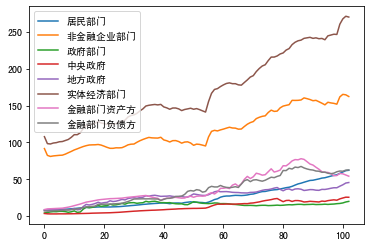

In [7]:
macro_cnbs_df.plot.line()

In [43]:
fund_em_info_df = ak.fund_em_open_fund_info(fund="161725", indicator="累计净值走势")
# fund_em_info_df = fund_em_info_df.drop(fund_em_info_df.columns[[0]], axis = 1)
fund_em_info_df.reset_index(drop=True, inplace=False)
fund_em_info_df.set_index('净值日期')
fund_em_info_df.index = pd.to_datetime(fund_em_info_df['净值日期'], format="%Y-%m-%d")
fund_em_info_df = fund_em_info_df.drop(fund_em_info_df.columns[[0]], axis = 1)
# fund_em_info_df['净值日期']= pd.to_datetime(fund_em_info_df['净值日期'])
fund_em_info_df.head()

,累计净值
净值日期,
2015-05-27,1.000
2015-05-29,0.995
2015-06-04,0.997
2015-06-05,1.012
2015-06-08,1.038


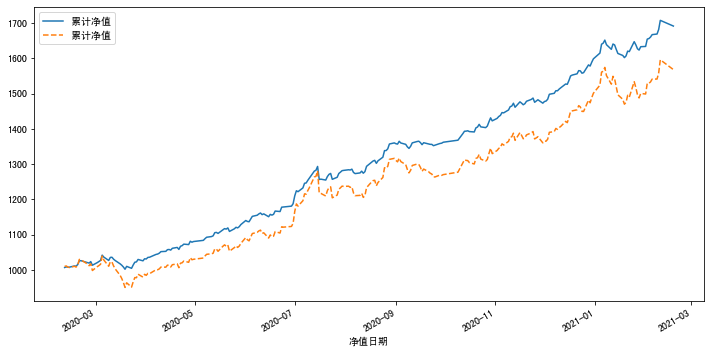

In [50]:
btr = erk.run_cppi(fund_em_info_df['2020-02-09':][['累计净值']].pct_change().dropna(), drawdown = 0.2)
ax = btr['Wealth'].plot(figsize=(12,6), legend=True)
btr['Risky Wealth'].plot(ax=ax, style='--', legend=True)

In [51]:
# fund_em_info_df['累计净值'].pct_change().dropna()
erk.summary_stats(btr['Wealth'].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
累计净值,0.025291,0.020104,-0.430759,5.703395,0.007799,0.010377,-0.228004,-0.038416


In [52]:
erk.summary_stats(btr['Risky Wealth'].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
累计净值,0.021401,0.034317,-0.407992,5.43759,0.015076,0.01939,-0.243912,-0.085454


In [9]:
fund_em_portfolio_hold_df = ak.fund_em_portfolio_hold(code="161725", year="2020")
print(fund_em_portfolio_hold_df)

     序号    股票代码  股票名称  占净值比例      持股数       持仓市值              季度
0     1  600809  山西汾酒  14.61  1888.95  708905.13  2020年4季度股票投资明细
1     2  002304  洋河股份  14.05  2888.21  681588.84  2020年4季度股票投资明细
2     3  000568  泸州老窖  13.91  2983.70  674793.25  2020年4季度股票投资明细
3     4  600519  贵州茅台  12.99   315.53  630433.14  2020年4季度股票投资明细
4     5  000858   五粮液  12.70  2111.65  616285.67  2020年4季度股票投资明细
..   ..     ...   ...    ...      ...        ...             ...
106  19  601658  邮储银行   0.03    79.66     412.63  2020年1季度股票投资明细
107  20  601077  渝农商行   0.01    20.48     107.00  2020年1季度股票投资明细
108  21  688396   华润微   0.01     1.99      64.47  2020年1季度股票投资明细
109  22  688200  华峰测控   0.00     0.38      55.89  2020年1季度股票投资明细
110  23  688208  道通科技   0.00     1.42      49.78  2020年1季度股票投资明细

[111 rows x 7 columns]


In [10]:
for item in fund_em_portfolio_hold_df['季度']:
    item = item.replace('年', '-').replace('季度股票投资明细', '')

In [11]:
fund_em_portfolio_hold_df.head()

,序号,股票代码,股票名称,占净值比例,持股数,持仓市值,季度
0,1,600809,山西汾酒,14.61,1888.95,708905.13,2020年4季度股票投资明细
1,2,002304,洋河股份,14.05,2888.21,681588.84,2020年4季度股票投资明细
2,3,000568,泸州老窖,13.91,2983.70,674793.25,2020年4季度股票投资明细
3,4,600519,贵州茅台,12.99,315.53,630433.14,2020年4季度股票投资明细
4,5,000858,五粮液,12.70,2111.65,616285.67,2020年4季度股票投资明细


In [12]:
# fund_em_portfolio_hold_df.set_index(['股票名称', '季度'])

In [13]:
fund_em_portfolio_hold_df = fund_em_portfolio_hold_df[['股票名称', '季度', '持股数']]

fund_em_portfolio_hold_df.pivot(index='股票名称', columns='季度', values='持股数').fillna(0)
# fund_em_portfolio_hold_df.plot.line(x='季度', y=['股票名称','持股数'])

季度,2020年1季度股票投资明细,2020年2季度股票投资明细,2020年3季度股票投资明细,2020年4季度股票投资明细
股票名称,,,,
ST舍得,809.53,634.43,746.23,0.00
万泰生物,0.00,0.08,0.00,0.00
中科星图,0.00,1.10,0.00,0.00
中船汉光,0.00,0.14,0.00,0.00
中芯国际,0.00,0.00,46.22,46.22
五粮液,1439.05,1093.09,1703.32,2111.65
今世缘,1726.41,1688.82,2630.35,3385.64
伊力特,762.51,584.49,910.22,0.00
北鼎股份,0.00,0.20,0.00,0.00
